In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('data.csv') #reading the csv file

In [25]:
df_info = df.info()   #Show the basic statistical description about the data.
df_description = df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  169 non-null    int64  
 1   Pulse     169 non-null    int64  
 2   Maxpulse  169 non-null    int64  
 3   Calories  164 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 5.4 KB


In [26]:
print("\nNull Values in Data:")  #Checking if the data has null values.
print(df.isnull().sum())



Null Values in Data:
Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64


In [27]:
df.fillna(df.mean(), inplace=True) #Replace null values with mean
print("\nData after replacing null values with mean:")
print(df.isnull().sum())



Data after replacing null values with mean:
Duration    0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64


In [28]:
aggregation = df[['Duration', 'Calories']].agg(['min', 'max', 'count', 'mean']) #Select at least two columns and aggregate the data using: min, max, count, mean.

print("\nAggregated Data (Duration and Calories):")
print(aggregation)


Aggregated Data (Duration and Calories):
         Duration     Calories
min     15.000000    50.300000
max    300.000000  1860.400000
count  169.000000   169.000000
mean    63.846154   375.790244


In [29]:
filtered_df1 = df[(df['Calories'] >= 500) & (df['Calories'] <= 1000)] #Filter the dataframe to select the rows with calories values between 500 and 1000.
print("\nRows with Calories between 500 and 1000:")
print(filtered_df1)



Rows with Calories between 500 and 1000:
     Duration  Pulse  Maxpulse  Calories
51         80    123       146     643.1
62        160    109       135     853.0
65        180     90       130     800.4
66        150    105       135     873.4
67        150    107       130     816.0
72         90    100       127     700.0
73        150     97       127     953.2
75         90     98       125     563.2
78        120    100       130     500.4
83        120    100       130     500.0
90        180    101       127     600.1
99         90     93       124     604.1
101        90     90       110     500.0
102        90     90       100     500.0
103        90     90       100     500.4
106       180     90       120     800.3
108        90     90       120     500.3


In [30]:
filtered_df2 = df[(df['Calories'] > 500) & (df['Pulse'] < 100)] #g. Filter the dataframe to select the rows with calories values > 500 and pulse < 100.
print("\nRows with Calories > 500 and Pulse < 100:")
print(filtered_df2)


Rows with Calories > 500 and Pulse < 100:
     Duration  Pulse  Maxpulse  Calories
65        180     90       130     800.4
70        150     97       129    1115.0
73        150     97       127     953.2
75         90     98       125     563.2
99         90     93       124     604.1
103        90     90       100     500.4
106       180     90       120     800.3
108        90     90       120     500.3


In [31]:
df_modified = df.drop(columns=['Maxpulse'])
print(df_modified.head())

   Duration  Pulse  Calories
0        60    110     409.1
1        60    117     479.0
2        60    103     340.0
3        45    109     282.4
4        45    117     406.0


In [32]:
df.drop(columns='Maxpulse', inplace=True)
df

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [33]:
df['Calories'] = df['Calories'].astype(int)
print(df.dtypes)

Duration    int64
Pulse       int64
Calories    int64
dtype: object


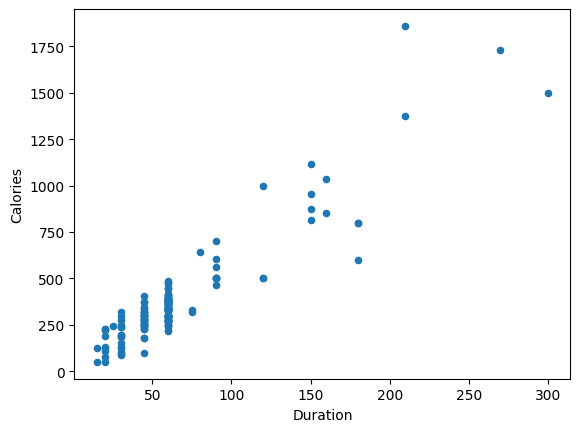

In [34]:
df.plot.scatter(x='Duration', y='Calories')
plt.show()

**2nd Question**

In [35]:
df_sal = pd.read_csv('Salary_Data.csv') #Import the given “Salary_Data.csv”
print(df_sal.head())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [36]:
X=df_sal[['YearsExperience']] #divide data into two parts X,y
y=df_sal['Salary']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=42) #spliting data in to training and testing
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (20, 1) (20,)
Testing set shape: (10, 1) (10,)


In [37]:
model=LinearRegression() # getting the model
model.fit(X_train,y_train) # training the model
y_pred=model.predict(X_test) #using predict to test the data with X_test
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 35301898.887134895


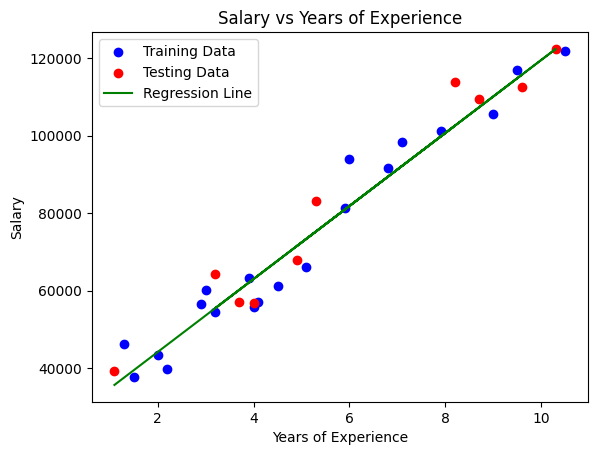

In [38]:
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Testing Data')
plt.plot(X_test, y_pred, color='green', label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Years of Experience')
plt.legend()

video link:
 https://drive.google.com/file/d/1SyDeWy92HfrZyP23-C1O6xJ3MB35zC9g/view?usp=drive_link